### Linear regressions with regularization: 
## Ridge and the Lasso

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

We will now try some alternative linear regressions: Ridge and Lasso regression. Just like OLS, they result in a linear fit to the data:

$y = \text{intercept} + \text{coef}[0] \cdot \text{height} + \text{coef}[1]\cdot \text{weight}$.

The only difference is that Ridge and Lasso has an in-built "regularization", which means they search for a balance between a good $R^2$ value and small coefficients. 

Note that it is important to scale your features when you use Ridge or Lasso (whereas it has no effect on the performance of an OLS regressor). But we don't have to do it as part of pre-processing - we can simply use the "normalize"-argument when we initialize the regressors. 

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
X = data.loc[:,'Gender':'Weight']
y = data['Index']

X = pd.get_dummies(X)
X

,Height,Weight,Gender_Female,Gender_Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1
...,...,...,...,...
495,150,153,1,0
496,184,121,1,0
497,141,136,1,0
498,150,95,0,1


In [3]:
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

# Ridge Regression
The `Ridge()` function has an alpha argument that is used to tune the model. We'll generate an array of alpha values ranging from very small to very big, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [4]:
alphas = 10**np.linspace(-10, 10, 100)

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix `coefs`. In this case, it is a $4 \times 100$
matrix, with 4 rows (one for each predictor) and 100
columns (one for each value of alpha). 

In [5]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
height_coefficients = [coef[0] for coef in coefs]
weight_coefficients = [coef[1] for coef in coefs]
gender_female_coefficients = [coef[2] for coef in coefs]
gender_male_coefficients = [coef[3] for coef in coefs]

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocess

We expect the coefficient estimates to be much smaller, when a large value of alpha is used, as compared to when a small value of alpha is used. Let's plot and find out:

Text(0, 0.5, 'weights')

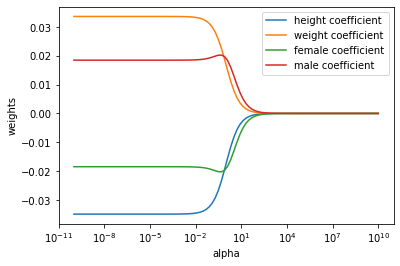

In [6]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, height_coefficients, label="height coefficient")
ax.plot(alphas, weight_coefficients, label="weight coefficient")
ax.plot(alphas, gender_female_coefficients, label="female coefficient")
ax.plot(alphas, gender_male_coefficients, label="male coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Let's compare the performance of the ridge regression for a few different values of alpha:

In [7]:
for alpha in [alphas[0], alphas[50], alphas[-1]]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alpha = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))
    print("")
    

alhpa = 1e-10
R^2 on train data is 0.8276198012652943 and on test data is 0.8185965989673533

alhpa = 1.2618568830660184
R^2 on train data is 0.5660815964794503 and on test data is 0.5958742789801224

alhpa = 10000000000.0
R^2 on train data is 1.631121904210886e-10 and on test data is -0.003581148656201405



C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocess

### Using cross validation to find the best value for alpha

We can use cross-validation to choose the best value of alpha. We can do this using
the cross-validated ridge regression function, `RidgeCV()`.

In [8]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.001873817422860383

The $R^2$ corresponding to this value for alpha are:

In [9]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(X_train, y_train), 
                                                              ridgecv.score(X_test,y_test)))

R^2 on train data is 0.8276167957504281 and on test data is 0.8188873993583978


and the coefficients associated with this value of alpha are:

In [10]:
ridgecv.coef_

array([-0.03636789,  0.03414609, -0.01406262,  0.01406262])

As expected, none of the coefficients are exactly zero - ridge regression does not
perform variable selection!

# The Lasso
In order to fit a lasso model, we'll
use the `Lasso()` function; however, this time we'll need to include the argument `max_iter = 10000`. Other than that change, we proceed just as we did in fitting a ridge model:

In [11]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
height_coefficients = [coef[0] for coef in coefs]
weight_coefficients = [coef[1] for coef in coefs]
gender_female_coefficients = [coef[2] for coef in coefs]
gender_male_coefficients = [coef[3] for coef in coefs]

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a p

Text(0, 0.5, 'weights')

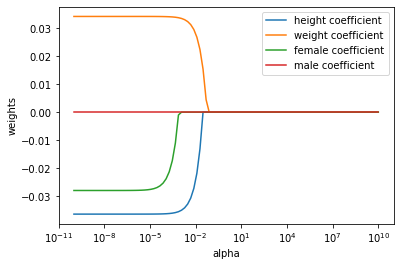

In [12]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, height_coefficients, label="height coefficient")
ax.plot(alphas, weight_coefficients, label="weight coefficient")
ax.plot(alphas, gender_female_coefficients, label="female coefficient")
ax.plot(alphas, gender_male_coefficients, label="male coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [13]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a p

Lasso(alpha=0.0002988633233398271, max_iter=10000, normalize=True)

Lets see what the best performance is using the Lasso:

In [14]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.8275666074074068 and on test data is 0.8195324690030925


This is a tiny bit worse than the best performance obtain using ridge regression. However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse! In addition to saving ressorces, this also makes the resulting model easier to interpret.

In [15]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Height          -0.036090
Weight           0.034029
Gender_Female   -0.017084
Gender_Male      0.000000
dtype: float64